<a href="https://colab.research.google.com/github/yuzai6666/AutoGPT/blob/master/text_classifier_on_MD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
import pandas as pd
import numpy as np
from transformers import BertTokenizer, TFBertForSequenceClassification
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Function to print evaluation metrics
def print_metrics(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{model_name}:")
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print(classification_report(y_test, y_pred))
    print("\n")

# Load dataset
data = pd.read_excel('sample_data/ai_products - ai_products.xlsx')
data['prod_description'] = data['prod_description'].astype(str)  # Ensure the text column is of string type
texts = data['prod_description'].tolist()
labels = data['risk_class'].map({'Class II': 0, 'Class III': 1}).tolist()  # Convert labels to numerical form
y = np.array(labels)

# BERT
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

def encode_texts(texts, tokenizer, max_length):
    input_ids, attention_masks = [], []
    for text in texts:
        encoded = tokenizer.encode_plus(text, add_special_tokens=True, max_length=max_length, padding='max_length',
                                        return_attention_mask=True, return_tensors='tf', truncation=True)
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids).reshape(len(texts), max_length), np.array(attention_masks).reshape(len(texts), max_length)

X_input_ids, X_attention_masks = encode_texts(texts, bert_tokenizer, max_length=100)
X_train_ids, X_test_ids, X_train_masks, X_test_masks = train_test_split(X_input_ids, X_attention_masks, test_size=0.25, random_state=42)

# Correctly use the Adam optimizer
bert_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
bert_model.fit([X_train_ids, X_train_masks], y_train, epochs=3, batch_size=8, validation_split=0.2)

y_pred_bert = np.argmax(bert_model.predict([X_test_ids, X_test_masks]), axis=1)
print_metrics(y_test, y_pred_bert, "BERT")


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ValueError: Could not interpret optimizer identifier: <keras.src.optimizers.adam.Adam object at 0x7db1ebfccee0>

In [ ]:
!pip install tensorflow transformers

In [ ]:
import pandas as pd
import numpy as np
from transformers import BertTokenizer, TFBertForSequenceClassification
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Function to print evaluation metrics
def print_metrics(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{model_name}:")
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print(classification_report(y_test, y_pred))
    print("\n")

# Load dataset
data = pd.read_excel('sample_data/ai_products - ai_products.xlsx')
data['prod_description'] = data['prod_description'].astype(str)  # Ensure the text column is of string type
texts = data['prod_description'].tolist()
labels = data['risk_class'].map({'Class II': 0, 'Class III': 1}).tolist()  # Convert labels to numerical form
y = np.array(labels)

# BERT
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

def encode_texts(texts, tokenizer, max_length):
    input_ids, attention_masks = [], []
    for text in texts:
        encoded = tokenizer.encode_plus(text, add_special_tokens=True, max_length=max_length, padding='max_length',
                                        return_attention_mask=True, return_tensors='tf', truncation=True)
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids).reshape(len(texts), max_length), np.array(attention_masks).reshape(len(texts), max_length)

X_input_ids, X_attention_masks = encode_texts(texts, bert_tokenizer, max_length=100)
X_train_ids, X_test_ids, X_train_masks, X_test_masks = train_test_split(X_input_ids, X_attention_masks, test_size=0.25, random_state=42)

# Correctly use the Adam optimizer
bert_model.compile(optimizer=Adam(learning_rate=2e-5), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
bert_model.fit([X_train_ids, X_train_masks], y_train, epochs=3, batch_size=8, validation_split=0.2)

y_pred_bert = np.argmax(bert_model.predict([X_test_ids, X_test_masks]), axis=1)
print_metrics(y_test, y_pred_bert, "BERT")


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ValueError: Could not interpret optimizer identifier: <keras.src.optimizers.adam.Adam object at 0x7db1d3e23d00>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load dataset
data = pd.read_excel('sample_data/ai_products - ai_products.xlsx')
data['prod_description'] = data['prod_description'].astype(str)
texts = data['prod_description'].tolist()
labels = data['risk_class'].map({'Class II': 0, 'Class III': 1}).tolist()
y = np.array(labels)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=10000)
X_tfidf = vectorizer.fit_transform(texts)

# Split the data
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.25, random_state=42)

# Function to print evaluation metrics
def print_metrics(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{model_name}:")
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print(classification_report(y_test, y_pred))
    print("\n")

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)
print_metrics(y_test, y_pred_nb, "Naive Bayes")

# SVM
svm_model = SVC()
svm_model.fit(X_train_tfidf, y_train)
y_pred_svm = svm_model.predict(X_test_tfidf)
print_metrics(y_test, y_pred_svm, "SVM")

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)
y_pred_lr = lr_model.predict(X_test_tfidf)
print_metrics(y_test, y_pred_lr, "Logistic Regression")

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_tfidf, y_train)
y_pred_rf = rf_model.predict(X_test_tfidf)
print_metrics(y_test, y_pred_rf, "Random Forest")


Naive Bayes:
Accuracy: 0.9411764705882353
Precision: 0.9111111111111111
Recall: 1.0
F1 Score: 0.9534883720930233
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        27
           1       0.91      1.00      0.95        41

    accuracy                           0.94        68
   macro avg       0.96      0.93      0.94        68
weighted avg       0.95      0.94      0.94        68



SVM:
Accuracy: 0.9558823529411765
Precision: 0.9318181818181818
Recall: 1.0
F1 Score: 0.9647058823529412
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        27
           1       0.93      1.00      0.96        41

    accuracy                           0.96        68
   macro avg       0.97      0.94      0.95        68
weighted avg       0.96      0.96      0.96        68



Logistic Regression:
Accuracy: 0.9411764705882353
Precision: 0.9111111111111111
Recall: 1.0
F1 Score: 0.9534883720930233
   

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, LSTM, Dropout
import tensorflow as tf

# Tokenize for deep learning models
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X_seq = pad_sequences(sequences, maxlen=100)

# Split the data
X_train_seq, X_test_seq, y_train, y_test = train_test_split(X_seq, y, test_size=0.25, random_state=42)

# CNN Model
def create_textcnn_model(input_length, vocab_size):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=input_length))
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

textcnn_model = create_textcnn_model(input_length=100, vocab_size=10000)
textcnn_model.fit(X_train_seq, y_train, epochs=5, batch_size=32, validation_split=0.2)
y_pred_textcnn = (textcnn_model.predict(X_test_seq) > 0.5).astype("int32")
print_metrics(y_test, y_pred_textcnn, "TextCNN")

# LSTM Model
def create_lstm_model(input_length, vocab_size):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=input_length))
    model.add(LSTM(128, return_sequences=False))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

lstm_model = create_lstm_model(input_length=100, vocab_size=10000)
lstm_model.fit(X_train_seq, y_train, epochs=5, batch_size=32, validation_split=0.2)
y_pred_lstm = (lstm_model.predict(X_test_seq) > 0.5).astype("int32")
print_metrics(y_test, y_pred_lstm, "LSTM")


Epoch 1/5
6/6 [==============================] - 2s 84ms/step - loss: 0.6914 - accuracy: 0.5155 - val_loss: 0.6753 - val_accuracy: 0.8537
Epoch 2/5
6/6 [==============================] - 0s 50ms/step - loss: 0.6686 - accuracy: 0.7019 - val_loss: 0.6396 - val_accuracy: 0.6341
Epoch 3/5
6/6 [==============================] - 0s 49ms/step - loss: 0.6463 - accuracy: 0.5714 - val_loss: 0.6057 - val_accuracy: 0.8780
Epoch 4/5
6/6 [==============================] - 0s 47ms/step - loss: 0.6066 - accuracy: 0.8261 - val_loss: 0.5729 - val_accuracy: 0.9268
Epoch 5/5
3/3 [==============================] - 0s 9ms/step
TextCNN:
Accuracy: 0.9411764705882353
Precision: 0.9111111111111111
Recall: 1.0
F1 Score: 0.9534883720930233
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        27
           1       0.91      1.00      0.95        41

    accuracy                           0.94        68
   macro avg       0.96      0.93      0.94        68
weight

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load dataset
data = pd.read_excel('sample_data/ai_products - ai_products.xlsx')
data['prod_description'] = data['prod_description'].astype(str)
texts = data['prod_description'].tolist()
labels = data['risk_class'].map({'Class II': 0, 'Class III': 1}).tolist()
y = np.array(labels)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=10000)
X_tfidf = vectorizer.fit_transform(texts)

# Split the data
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.25, random_state=42)

# Function to print evaluation metrics
def get_metrics(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return {
        'model': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'classification_report': report
    }

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_tfidf, y_train)
y_pred_dt = dt_model.predict(X_test_tfidf)
dt_metrics = get_metrics(y_test, y_pred_dt, "Decision Tree")

# Gradient Boosting Machine
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_tfidf, y_train)
y_pred_gbm = gbm_model.predict(X_test_tfidf)
gbm_metrics = get_metrics(y_test, y_pred_gbm, "Gradient Boosting Machine")

results_tree_gbm = {
    'decision_tree': dt_metrics,
    'gbm': gbm_metrics
}

results_tree_gbm


{'decision_tree': {'model': 'Decision Tree',
  'accuracy': 0.9558823529411765,
  'precision': 0.9318181818181818,
  'recall': 1.0,
  'f1_score': 0.9647058823529412,
  'classification_report': '              precision    recall  f1-score   support\n\n           0       1.00      0.89      0.94        27\n           1       0.93      1.00      0.96        41\n\n    accuracy                           0.96        68\n   macro avg       0.97      0.94      0.95        68\nweighted avg       0.96      0.96      0.96        68\n'},
 'gbm': {'model': 'Gradient Boosting Machine',
  'accuracy': 0.9558823529411765,
  'precision': 0.9318181818181818,
  'recall': 1.0,
  'f1_score': 0.9647058823529412,
  'classification_report': '              precision    recall  f1-score   support\n\n           0       1.00      0.89      0.94        27\n           1       0.93      1.00      0.96        41\n\n    accuracy                           0.96        68\n   macro avg       0.97      0.94      0.95       

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

# LDA (Latent Dirichlet Allocation)
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(X_tfidf)
# Get topics
lda_topics = []
for idx, topic in enumerate(lda.components_):
    topic_terms = [(vectorizer.get_feature_names_out()[i], topic[i]) for i in topic.argsort()[:-11:-1]]
    lda_topics.append(topic_terms)

# K-means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_tfidf)
kmeans_labels = kmeans.labels_

# Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=2)
hc.fit(X_tfidf.toarray())
hc_labels = hc.labels_

print("LDA Topics:")
print(lda_topics)

print("K-means Labels:")
print(kmeans_labels)

print("Hierarchical Clustering Labels:")
print(hc_labels)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


LDA Topics:
[[('çª', 3.265633840397225), ('šå¼', 3.026271611196667), ('èƒ', 1.9426145801353072), ('œç³', 1.640521623620267), ('ç½', 1.5976122458616189), ('¾è', 1.3114999243492116), ('ä½', 1.193120462120178), ('æÿ', 1.178320341981872), ('¾åƒ', 1.1595628820374082), ('ç³', 1.0677005253802512)], [('æœ', 10.216649745958188), ('åº', 7.818780849250592), ('è½', 6.762566225357417), ('æˆ', 6.193449866424945), ('ï¼', 4.4951454760960665), ('žè', 4.128623273211933), ('æµ', 3.7802509245960043), ('ªä', 3.4214656251275786), ('åœ', 3.34902947546027), ('ˆå', 3.2345568336233033)], [('å½', 20.895300524355683), ('åƒ', 9.591192441555055), ('ç½', 9.394752261896976), ('xå', 9.377940831520116), ('æž', 7.062790540219032), ('æµ', 6.792793020813347), ('éº', 5.876788412385463), ('ÿå', 5.821393283850443), ('çº', 5.775262917432631), ('šä½', 5.694538397369018)], [('ï¼ˆacquisitionè½', 0.6234781040714414), ('2ï¼œcs', 0.6234781040714414), ('acquisitionè½', 0.5751780677805503), ('ƒå¾', 0.40551310821142383), ('¾çš', 0.405

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load dataset
data = pd.read_excel('sample_data/ai_products - ai_products.xlsx')

# Ensure the text column is of string type
data['prod_description'] = data['prod_description'].astype(str)

# Convert labels to numerical form
data['risk_class'] = data['risk_class'].map({'Class II': 0, 'Class III': 1})

# Define a simple rule-based classifier function
def rule_based_classifier(description):
    # Define keywords indicative of "Class III"
    class_iii_keywords = ['implantable', 'life-supporting', 'critical', 'high-risk']
    # Define keywords indicative of "Class II"
    class_ii_keywords = ['non-critical', 'moderate-risk', 'monitoring', 'diagnostic']

    # Check for Class III keywords
    if any(keyword in description.lower() for keyword in class_iii_keywords):
        return 1  # Class III
    # Check for Class II keywords
    elif any(keyword in description.lower() for keyword in class_ii_keywords):
        return 0  # Class II
    else:
        # Default class if no keywords are found (choose the most common class or use domain knowledge)
        return 0  # Assuming Class II is more common or safer default

# Apply the rule-based classifier to each product description
data['predicted_class'] = data['prod_description'].apply(rule_based_classifier)

# Extract true labels and predicted labels
y_true = data['risk_class']
y_pred = data['predicted_class']

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
report = classification_report(y_true, y_pred)

print(f"Rule-Based Classifier:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(report)


Rule-Based Classifier:
Accuracy: 0.43703703703703706
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
              precision    recall  f1-score   support

           0       0.44      1.00      0.61       118
           1       0.00      0.00      0.00       152

    accuracy                           0.44       270
   macro avg       0.22      0.50      0.30       270
weighted avg       0.19      0.44      0.27       270



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Unde

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load dataset
data = pd.read_excel('sample_data/ai_products - ai_products.xlsx')

# Ensure the text column is of string type
data['prod_description'] = data['prod_description'].astype(str)

# Feature (X) - Product Descriptions
X = data['prod_description']

# Label (y) - Risk Class
y = data['risk_class'].map({'Class II': 0, 'Class III': 1}).tolist()

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=10000)
X_tfidf = vectorizer.fit_transform(X)

# Convert labels to numpy array
y = np.array(y)

# Split the data into training and testing sets
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.25, random_state=42)

# Define individual classifiers
nb_model = MultinomialNB()
svm_model = SVC(probability=True)  # SVC with probability=True for Voting Classifier
lr_model = LogisticRegression()
rf_model = RandomForestClassifier()

# Create a Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('nb', nb_model),
        ('svm', svm_model),
        ('lr', lr_model),
        ('rf', rf_model)
    ],
    voting='soft'  # 'soft' for probability-based voting, 'hard' for majority voting
)

# Train the Voting Classifier
voting_clf.fit(X_train_tfidf, y_train)

# Make predictions on the testing data
y_pred_voting = voting_clf.predict(X_test_tfidf)

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred_voting)
precision = precision_score(y_test, y_pred_voting)
recall = recall_score(y_test, y_pred_voting)
f1 = f1_score(y_test, y_pred_voting)
report = classification_report(y_test, y_pred_voting)

print(f"Voting Classifier:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(report)


Voting Classifier:
Accuracy: 0.9558823529411765
Precision: 0.9318181818181818
Recall: 1.0
F1 Score: 0.9647058823529412
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        27
           1       0.93      1.00      0.96        41

    accuracy                           0.96        68
   macro avg       0.97      0.94      0.95        68
weighted avg       0.96      0.96      0.96        68



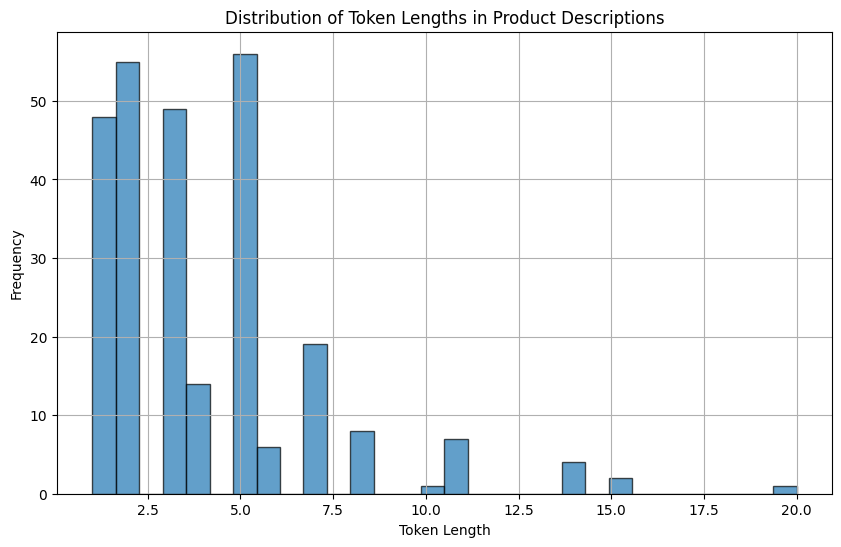

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_excel('sample_data/ai_products - ai_products.xlsx')  # Replace with your actual file path

# Ensure the text column is of string type
data['prod_description'] = data['prod_description'].astype(str)

# Tokenize the product descriptions and get the length of each tokenized description
data['token_length'] = data['prod_description'].apply(lambda x: len(x.split()))

# Plot the distribution of token lengths
plt.figure(figsize=(10, 6))
plt.hist(data['token_length'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Token Lengths in Product Descriptions')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Voting Classifier:
Accuracy: 0.9558823529411765
Precision: 0.9318181818181818
Recall: 1.0
F1 Score: 0.9647058823529412
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        27
           1       0.93      1.00      0.96        41

    accuracy                           0.96        68
   macro avg       0.97      0.94      0.95        68
weighted avg       0.96      0.96      0.96        68



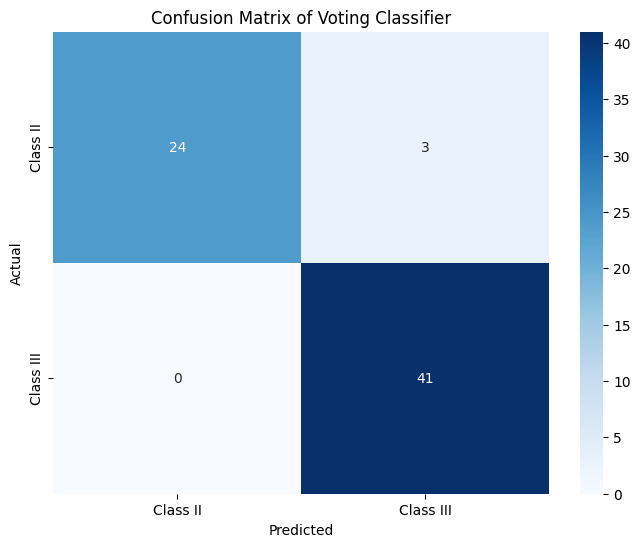

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Load dataset
data = pd.read_excel('sample_data/ai_products - ai_products.xlsx')

# Ensure the text column is of string type
data['prod_description'] = data['prod_description'].astype(str)

# Feature (X) - Product Descriptions
X = data['prod_description']

# Label (y) - Risk Class
y = data['risk_class'].map({'Class II': 0, 'Class III': 1}).tolist()

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=10000)
X_tfidf = vectorizer.fit_transform(X)

# Convert labels to numpy array
y = np.array(y)

# Split the data into training and testing sets
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.25, random_state=42)

# Define individual classifiers
nb_model = MultinomialNB()
svm_model = SVC(probability=True)  # SVC with probability=True for Voting Classifier
lr_model = LogisticRegression()
rf_model = RandomForestClassifier()

# Create a Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('nb', nb_model),
        ('svm', svm_model),
        ('lr', lr_model),
        ('rf', rf_model)
    ],
    voting='soft'  # 'soft' for probability-based voting, 'hard' for majority voting
)

# Train the Voting Classifier
voting_clf.fit(X_train_tfidf, y_train)

# Make predictions on the testing data
y_pred_voting = voting_clf.predict(X_test_tfidf)

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred_voting)
precision = precision_score(y_test, y_pred_voting)
recall = recall_score(y_test, y_pred_voting)
f1 = f1_score(y_test, y_pred_voting)
report = classification_report(y_test, y_pred_voting)

print(f"Voting Classifier:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(report)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_voting)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class II', 'Class III'], yticklabels=['Class II', 'Class III'])
plt.title('Confusion Matrix of Voting Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


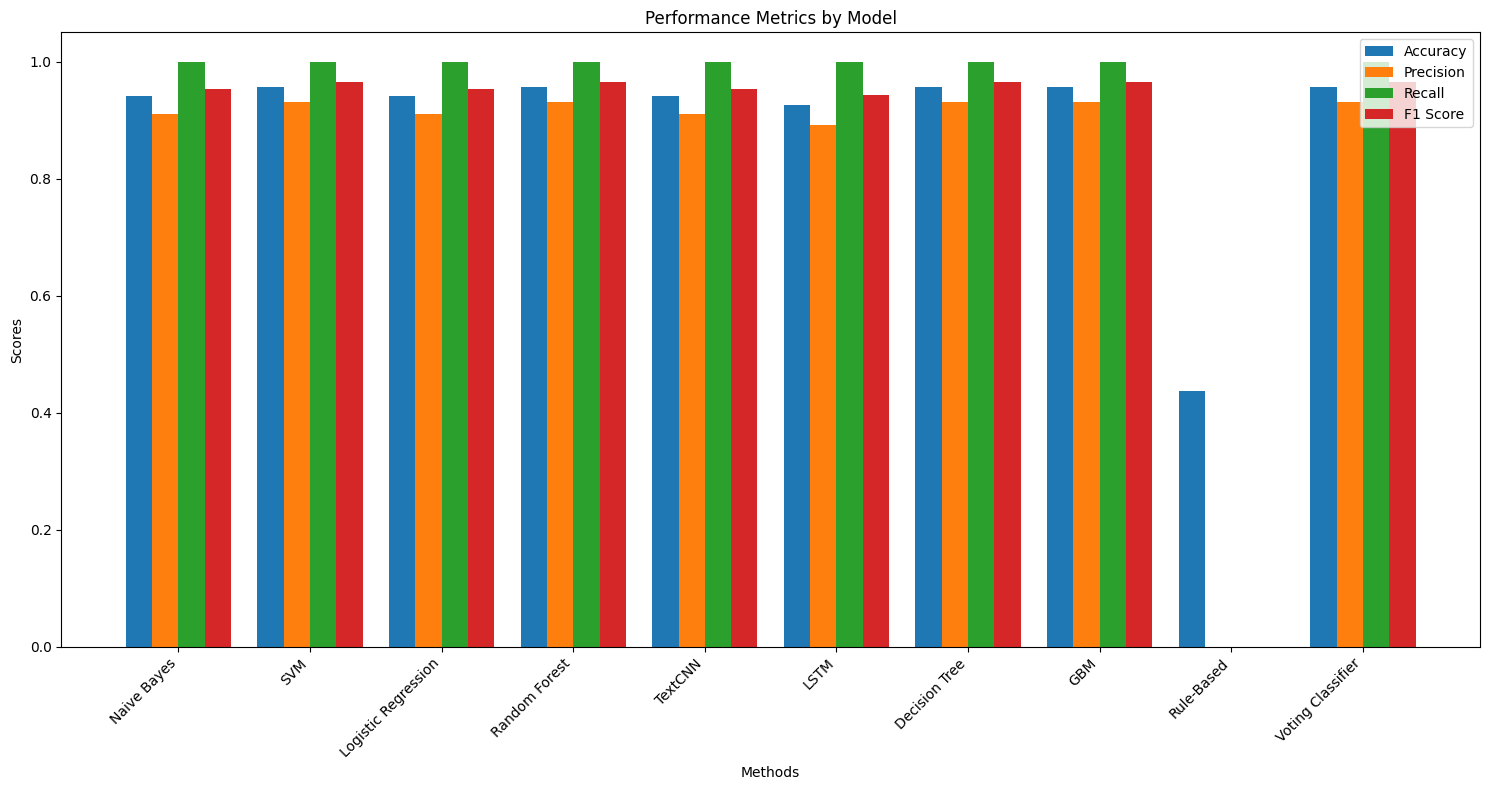

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
methods = ['Naive Bayes', 'SVM', 'Logistic Regression', 'Random Forest', 'TextCNN', 'LSTM', 'Decision Tree', 'GBM', 'Rule-Based', 'Voting Classifier']
accuracy = [0.9412, 0.9559, 0.9412, 0.9559, 0.9412, 0.9265, 0.9559, 0.9559, 0.4370, 0.9559]
precision = [0.9111, 0.9318, 0.9111, 0.9318, 0.9111, 0.8913, 0.9318, 0.9318, 0.0, 0.9318]
recall = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0]
f1_score = [0.9535, 0.9647, 0.9535, 0.9647, 0.9535, 0.9425, 0.9647, 0.9647, 0.0, 0.9647]

x = np.arange(len(methods))
width = 0.2

fig, ax = plt.subplots(figsize=(15, 8))
rects1 = ax.bar(x - width*1.5, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - width/2, precision, width, label='Precision')
rects3 = ax.bar(x + width/2, recall, width, label='Recall')
rects4 = ax.bar(x + width*1.5, f1_score, width, label='F1 Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Methods')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics by Model')
ax.set_xticks(x)
ax.set_xticklabels(methods, rotation=45, ha="right")
ax.legend()

fig.tight_layout()
plt.show()


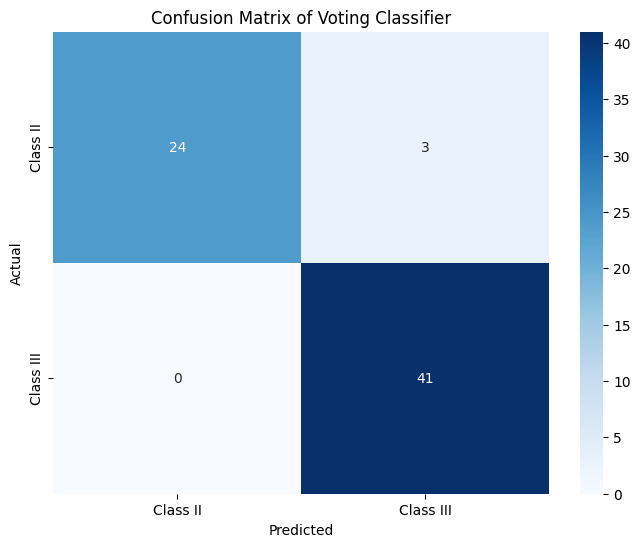

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming y_test and y_pred are defined
cm = confusion_matrix(y_test, y_pred_voting)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class II', 'Class III'], yticklabels=['Class II', 'Class III'])
plt.title('Confusion Matrix of Voting Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


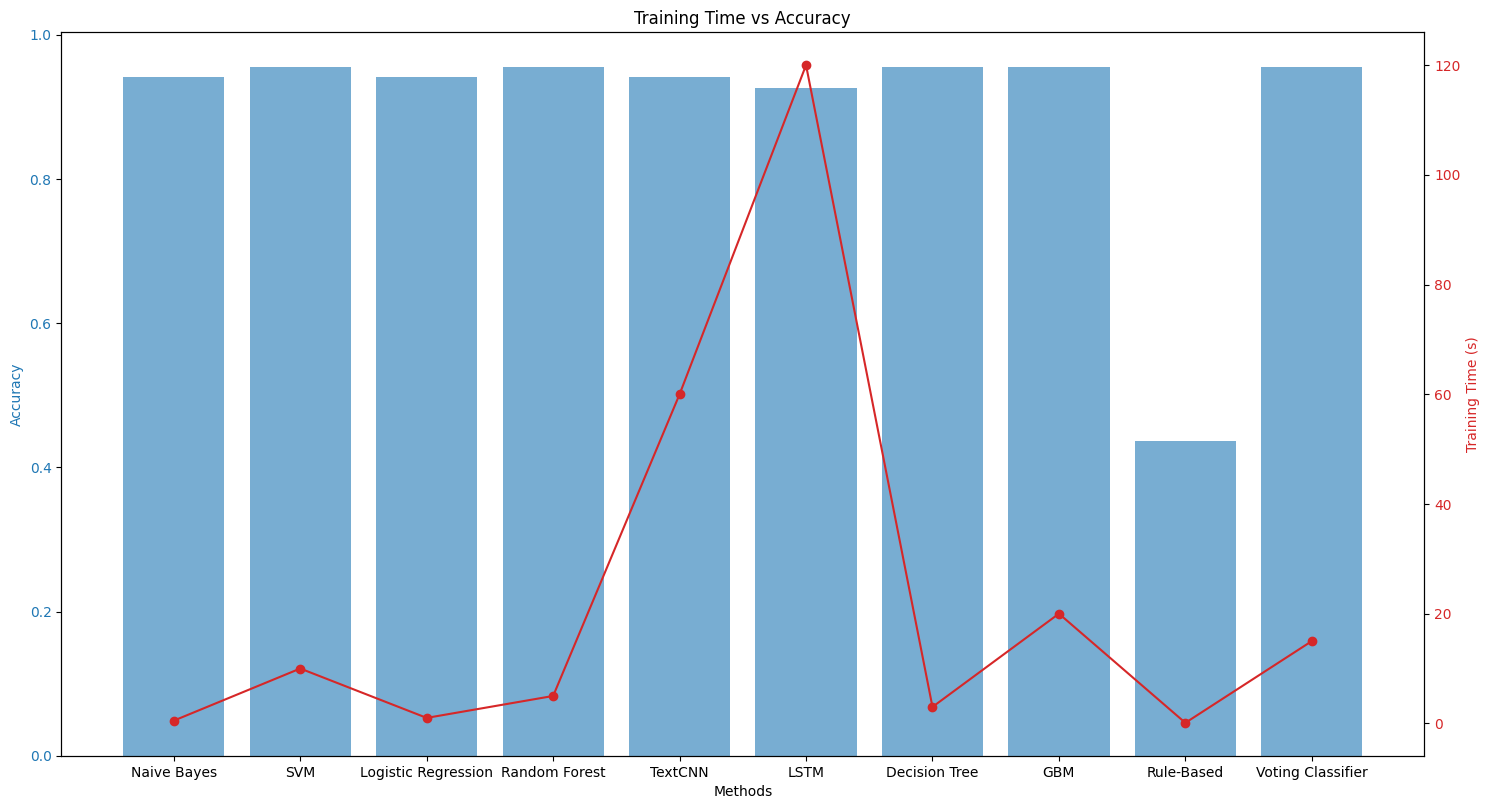

In [ ]:
# Example data (fill in with actual values)
training_times = [0.5, 10, 1, 5, 60, 120, 3, 20, 0.1, 15]  # in seconds

fig, ax1 = plt.subplots(figsize=(15, 8))

color = 'tab:blue'
ax1.set_xlabel('Methods')
ax1.set_ylabel('Accuracy', color=color)
ax1.bar(methods, accuracy, color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Training Time (s)', color=color)
ax2.plot(methods, training_times, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Training Time vs Accuracy')
plt.show()


In [ ]:
# Example for Random Forest
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the model
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_tfidf.shape[1]), importances[indices], align="center")
plt.xticks(range(X_tfidf.shape[1]), indices)
plt.xlim([-1, X_tfidf.shape[1]])
plt.show()


NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.